<a href="https://colab.research.google.com/github/NirajDataAnalytics/Literacy-rate/blob/main/Copy_of_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Brief Description of the Project- There are 8 Independent Features and 1 Dependent Features.
1. Independent Features are - a. Nitrogen - ratio of Nitrogen content in soil
                              b. Phosphorus - ratio of Phosphorus content in soil
                              c. Potassium - ratio of Potassium content in soil
                              d. Temperature - temperature in degree Celsius
                              e. Humidity - relative humidity in %
                              f. pH_Value - pH value of the soil
                              g. Rainfall - rainfall in mm
                              h. Crop- Name of the Crop

2. Target Variable/Dpependent Features: Yield (Qt/Ha)

3. Process Flow Chart:        a. Import the necessary Libararies
                              b. Exploratiry Data Visualization
                              b.1 Check any null, duplicated, outliers data
                              b.2 Different types of visualization
                              c. Change Categorical data to Numeric
                              d. Split the data in training and testing
                              f. Select the models
                              g. Train the models
                              h. predict the models
                              i. Compare the models


In [1]:
import pandas as pd
df= pd.read_csv('/content/Crop_Yield_Prediction.csv')
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,120000


In [2]:
df.tail()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee,1000
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee,800
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee,560
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee,1500
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,Coffee,1400


In [3]:
df.isna().sum()

,0
Nitrogen,0
Phosphorus,0
Potassium,0
Temperature,0
Humidity,0
pH_Value,0
Rainfall,0
Crop,0
Yield,0


In [4]:
df.duplicated().sum()

0

In [5]:
df.dtypes

,0
Nitrogen,int64
Phosphorus,int64
Potassium,int64
Temperature,float64
Humidity,float64
pH_Value,float64
Rainfall,float64
Crop,object
Yield,int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
 8   Yield        2200 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


In [7]:
df.shape

(2200, 9)

In [8]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Yield
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,2689.228182
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,3710.361267
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,2.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,950.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,1825.000000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,3500.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,120000.000000


In [9]:
df['Crop'].unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [10]:
df['Crop'].value_counts()

,count
Crop,
Rice,100
Maize,100
Jute,100
Cotton,100
Coconut,100
Papaya,100
Orange,100
Apple,100
Muskmelon,100


In [11]:
df.nunique()

,0
Nitrogen,137
Phosphorus,117
Potassium,73
Temperature,2200
Humidity,2200
pH_Value,2200
Rainfall,2200
Crop,22
Yield,502


In [12]:
crop_summary= pd.pivot_table(df, index=['Crop'], aggfunc='mean')
crop_summary

,Humidity,Nitrogen,Phosphorus,Potassium,Rainfall,Temperature,Yield,pH_Value
Crop,,,,,,,,
Apple,92.333383,20.80,134.22,199.89,112.654779,22.630942,1704.25,5.929663
Banana,80.358123,100.23,82.01,50.05,104.626980,27.376798,2377.09,5.983893
Blackgram,65.118426,40.02,67.47,19.24,67.884151,29.973340,2131.43,7.133952
ChickPea,16.860439,40.09,67.79,79.92,80.058977,18.872847,2531.26,7.336957
Coconut,94.844272,21.98,16.93,30.59,175.686646,27.409892,2550.84,5.976562
Coffee,58.869846,101.20,28.74,29.94,158.066295,25.540477,2638.90,6.790308
Cotton,79.843474,117.77,46.24,19.56,80.398043,23.988958,1411.05,6.912675
Grapes,81.875228,23.18,132.53,200.11,69.611829,23.849575,2840.35,6.025937
Jute,79.639864,78.40,46.86,39.99,174.792798,24.958376,1789.90,6.732778


In [13]:
crop_summary_new= crop_summary.reset_index()
crop_summary_new

,Crop,Humidity,Nitrogen,Phosphorus,Potassium,Rainfall,Temperature,Yield,pH_Value
0,Apple,92.333383,20.80,134.22,199.89,112.654779,22.630942,1704.25,5.929663
1,Banana,80.358123,100.23,82.01,50.05,104.626980,27.376798,2377.09,5.983893
2,Blackgram,65.118426,40.02,67.47,19.24,67.884151,29.973340,2131.43,7.133952
3,ChickPea,16.860439,40.09,67.79,79.92,80.058977,18.872847,2531.26,7.336957
4,Coconut,94.844272,21.98,16.93,30.59,175.686646,27.409892,2550.84,5.976562
5,Coffee,58.869846,101.20,28.74,29.94,158.066295,25.540477,2638.90,6.790308
6,Cotton,79.843474,117.77,46.24,19.56,80.398043,23.988958,1411.05,6.912675
7,Grapes,81.875228,23.18,132.53,200.11,69.611829,23.849575,2840.35,6.025937
8,Jute,79.639864,78.40,46.86,39.99,174.792798,24.958376,1789.90,6.732778
9,KidneyBeans,21.605357,20.75,67.54,20.05,105.919778,20.115085,3161.20,5.749411


In [14]:
df_new= df[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']]

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


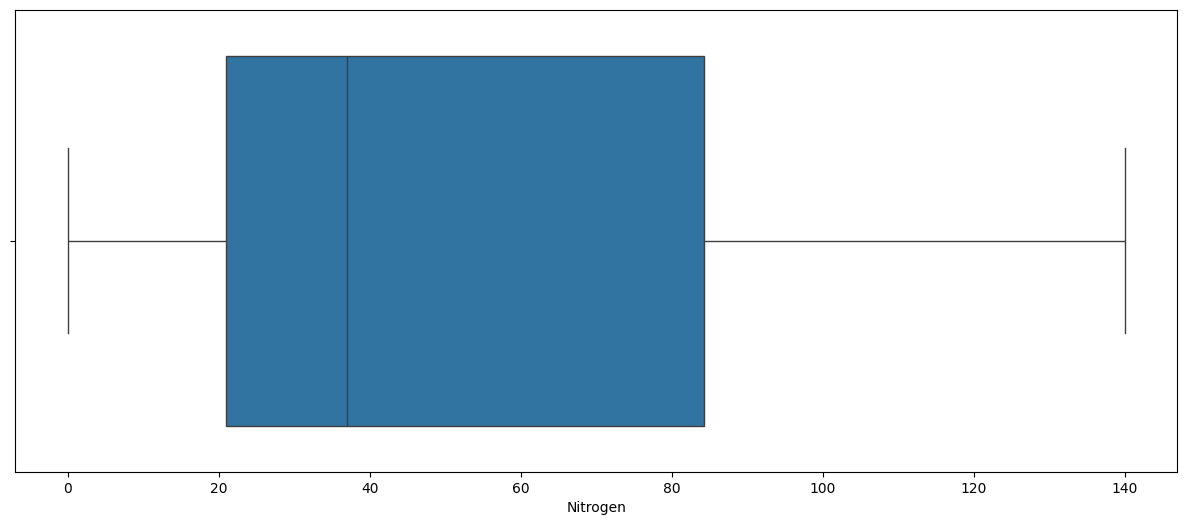

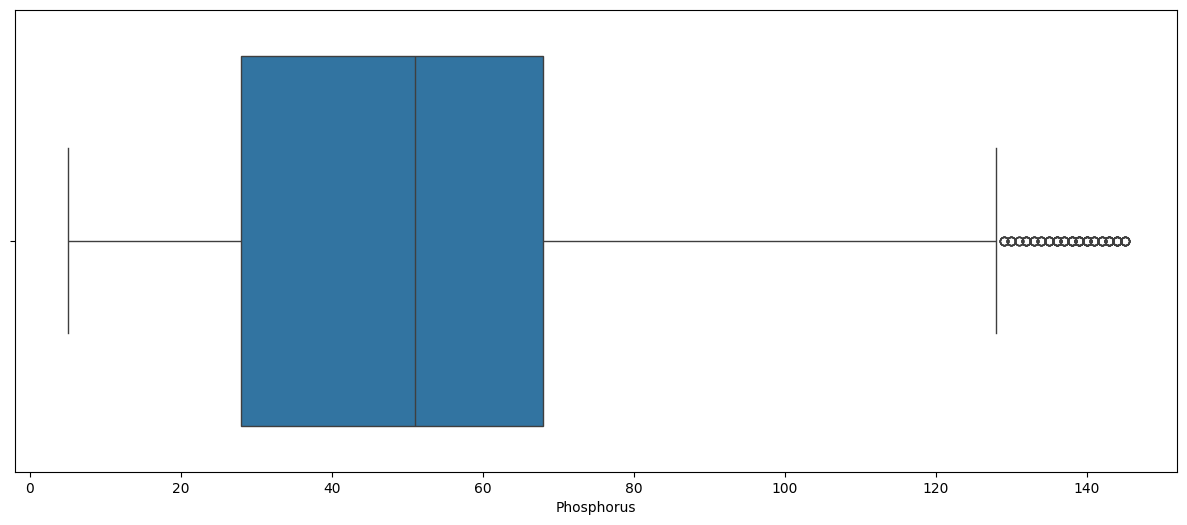

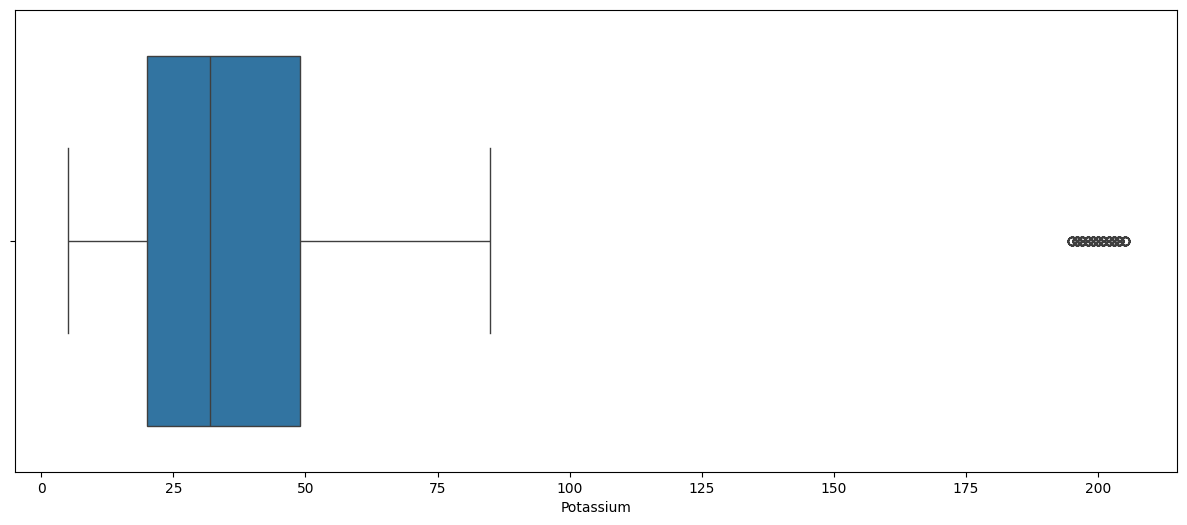

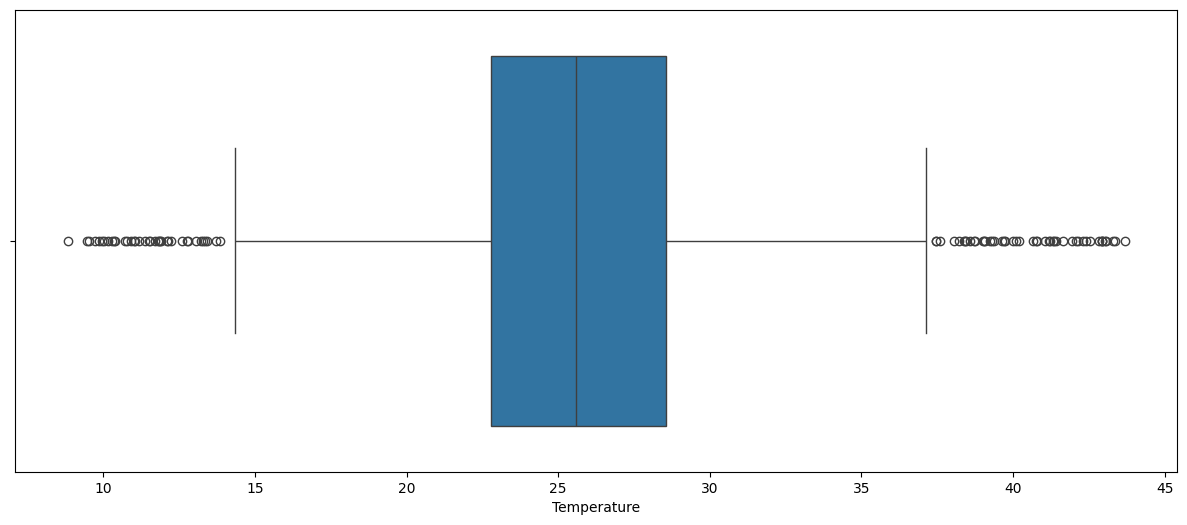

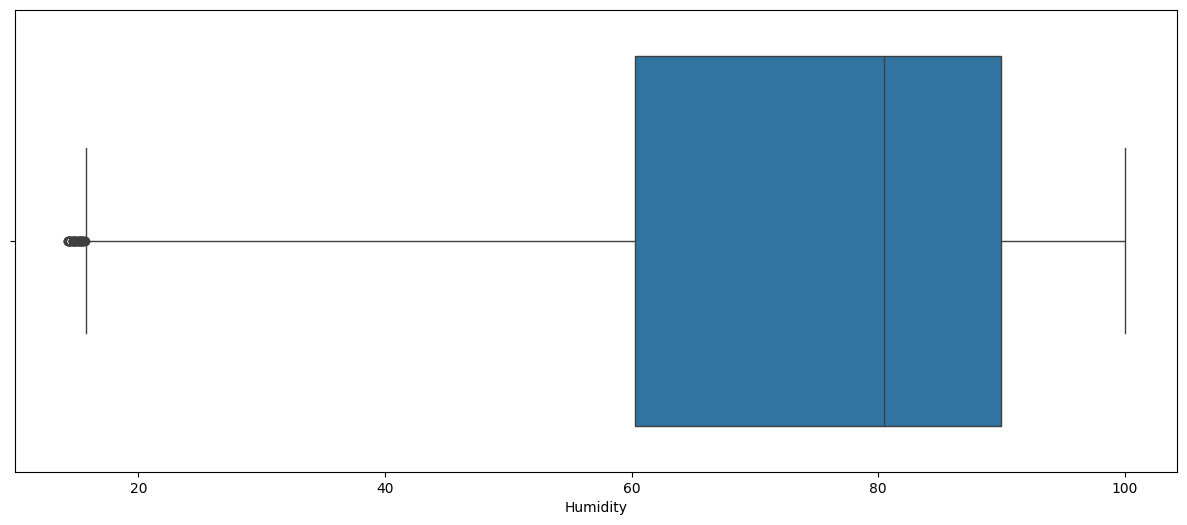

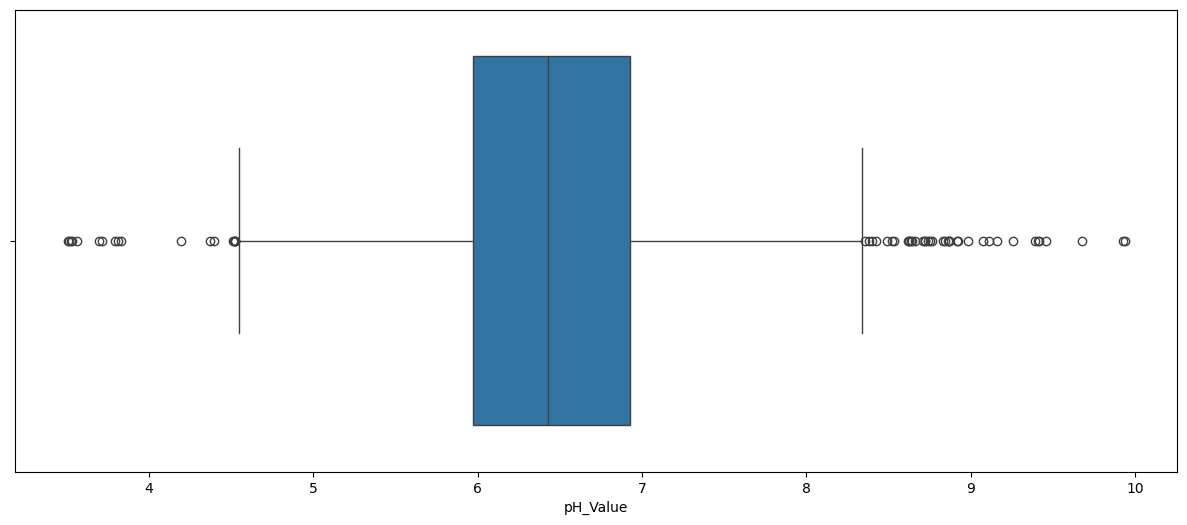

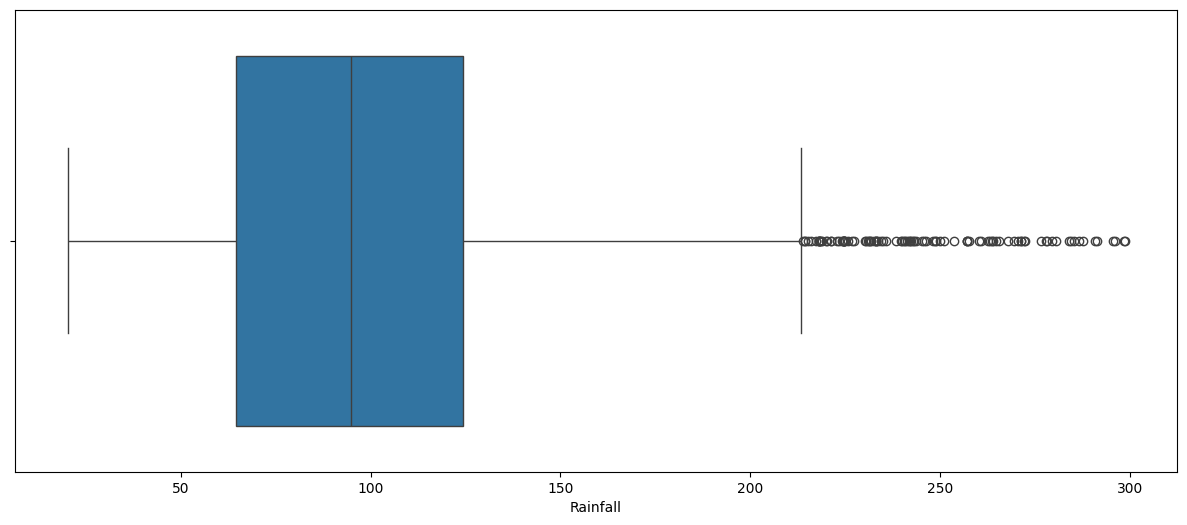

In [16]:
for col in df_new.columns:
  plt.figure(figsize= (15,6))
  sns.boxplot(x= df_new[col])
  plt.show()

<ipython-input-17-0884b57a0014>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Crop', y= col, data= crop_summary_new, palette='Set1')


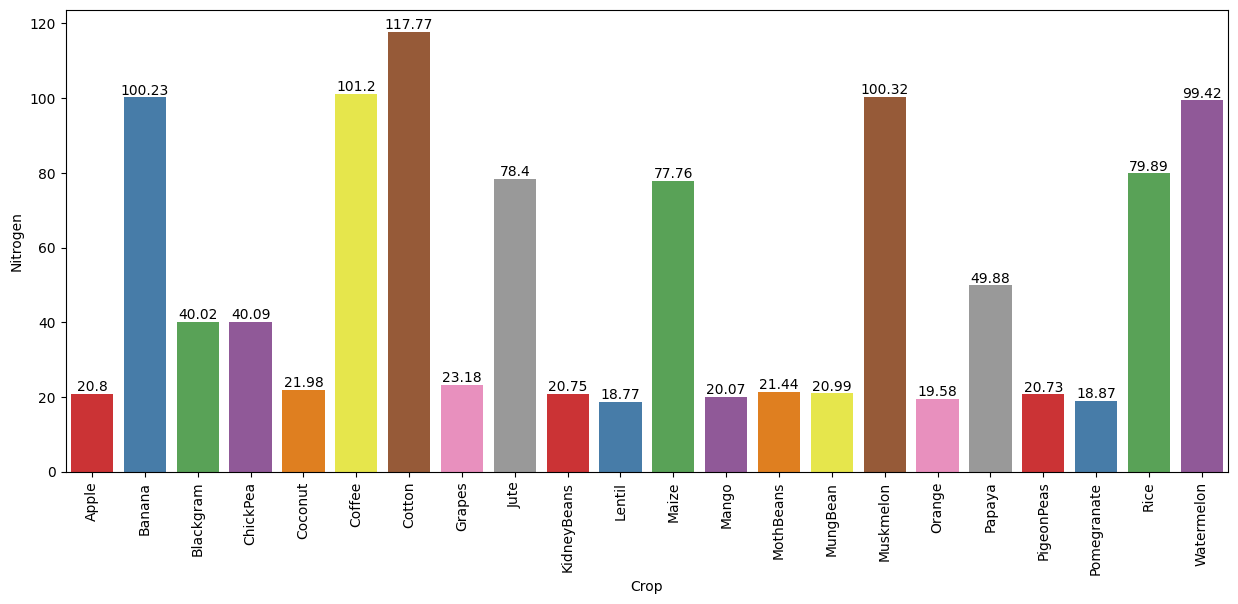

<ipython-input-17-0884b57a0014>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Crop', y= col, data= crop_summary_new, palette='Set1')


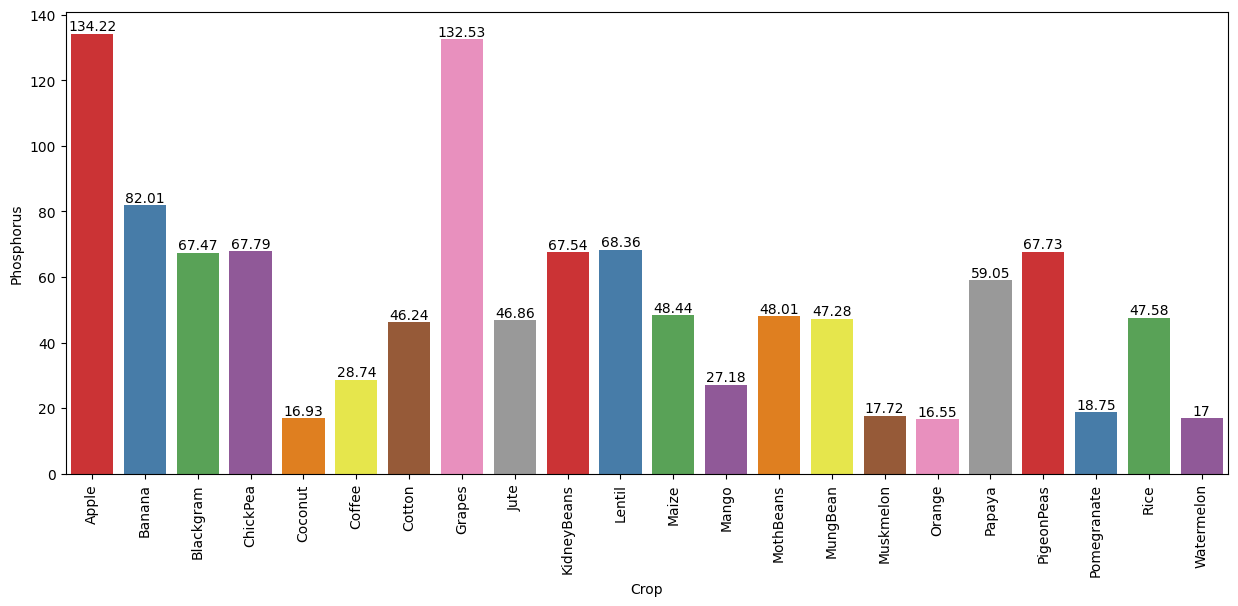

<ipython-input-17-0884b57a0014>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Crop', y= col, data= crop_summary_new, palette='Set1')


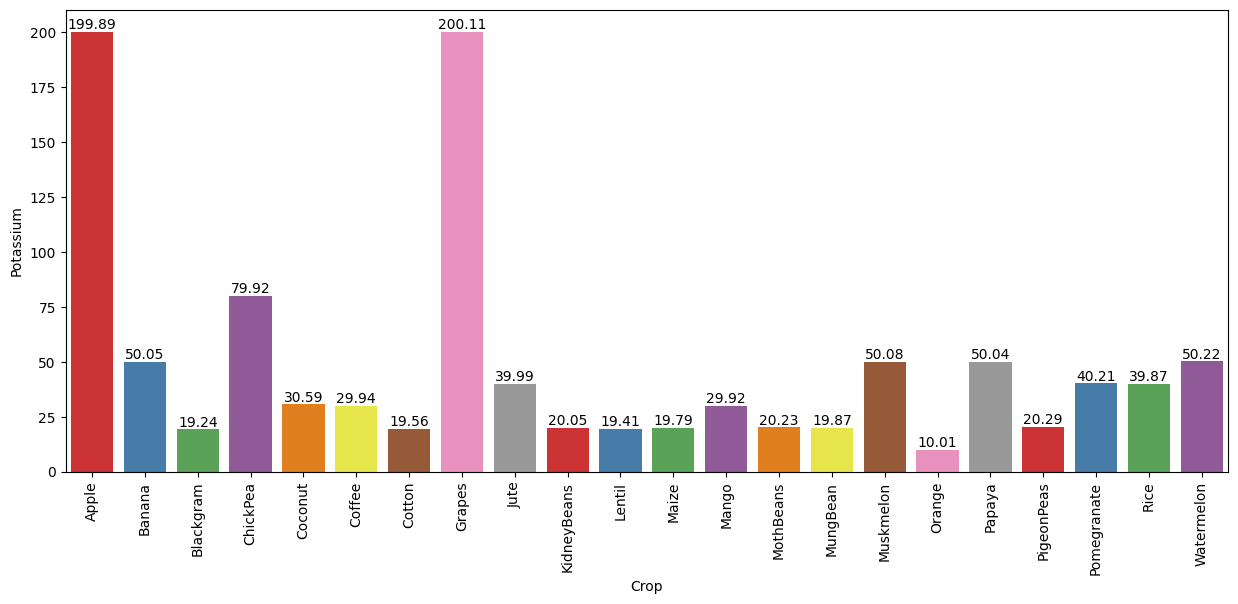

<ipython-input-17-0884b57a0014>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Crop', y= col, data= crop_summary_new, palette='Set1')


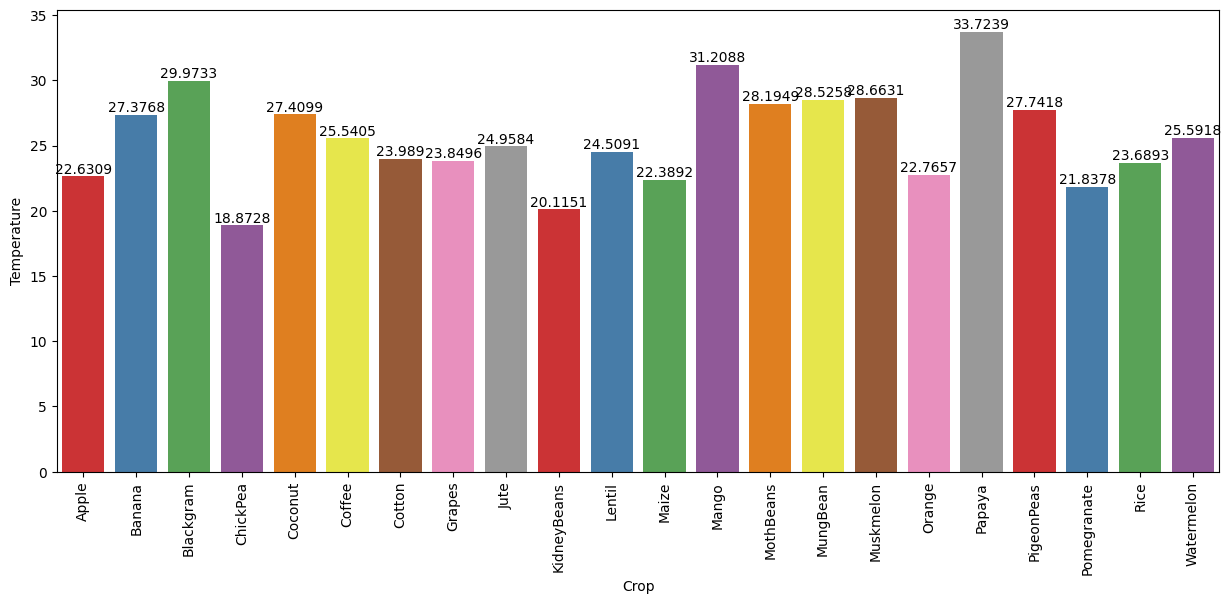

<ipython-input-17-0884b57a0014>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Crop', y= col, data= crop_summary_new, palette='Set1')


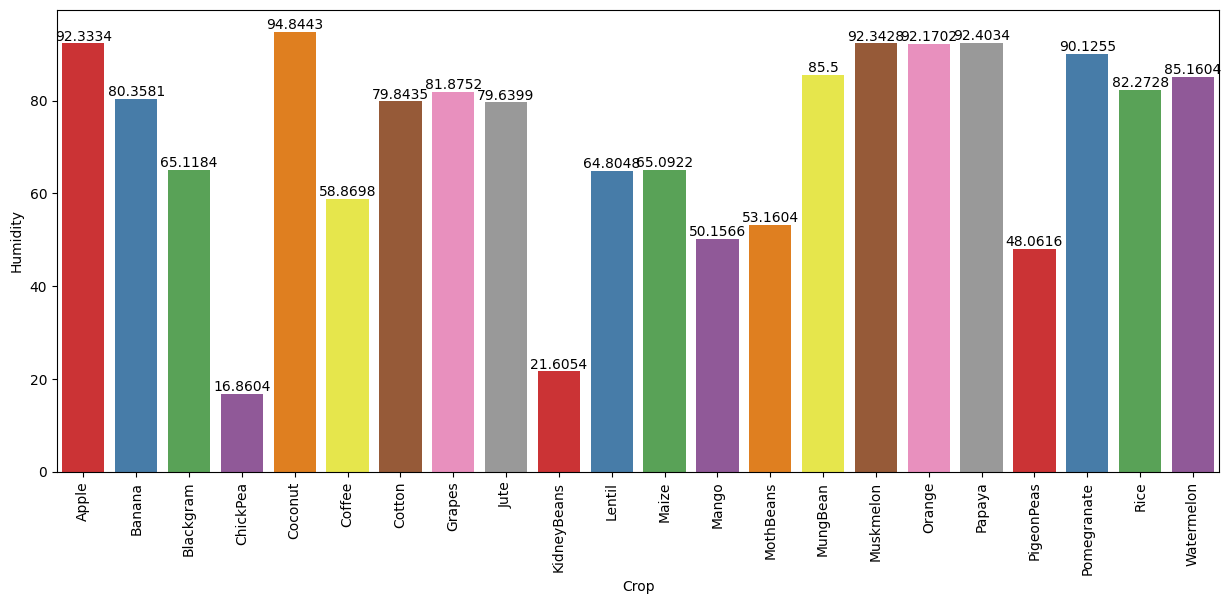

<ipython-input-17-0884b57a0014>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Crop', y= col, data= crop_summary_new, palette='Set1')


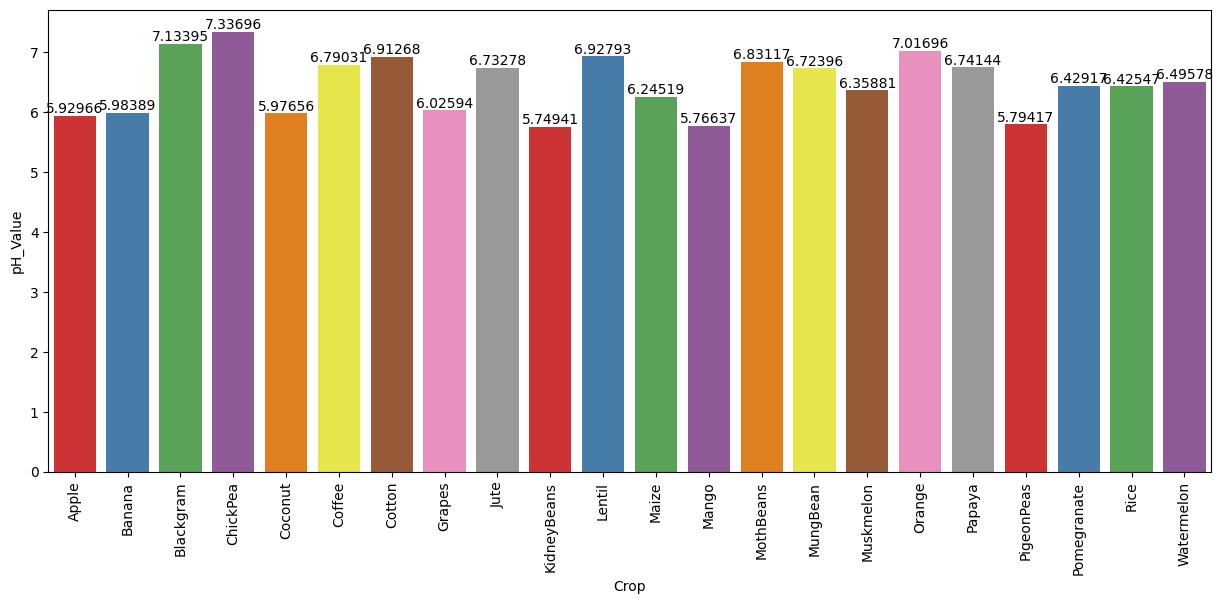

<ipython-input-17-0884b57a0014>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Crop', y= col, data= crop_summary_new, palette='Set1')


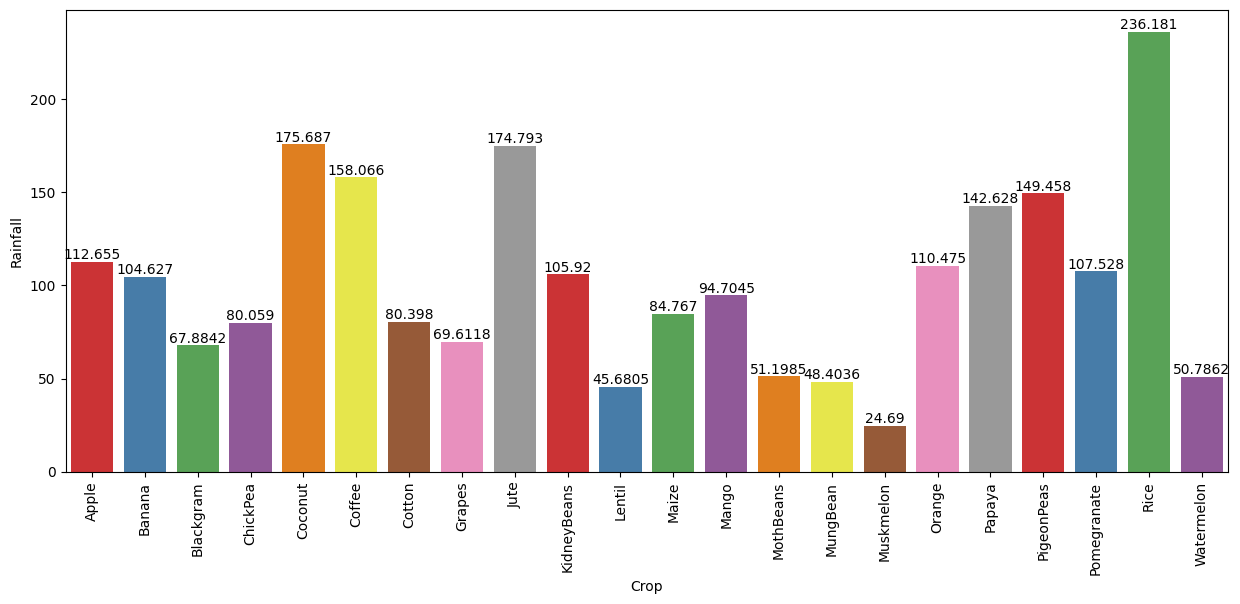

In [17]:
for col in df_new.columns:
  plt.figure(figsize=(15,6))
  ax=sns.barplot(x='Crop', y= col, data= crop_summary_new, palette='Set1')
  plt.xticks(rotation=90)
  for i in ax.containers:
    ax.bar_label(i,)
  plt.show()

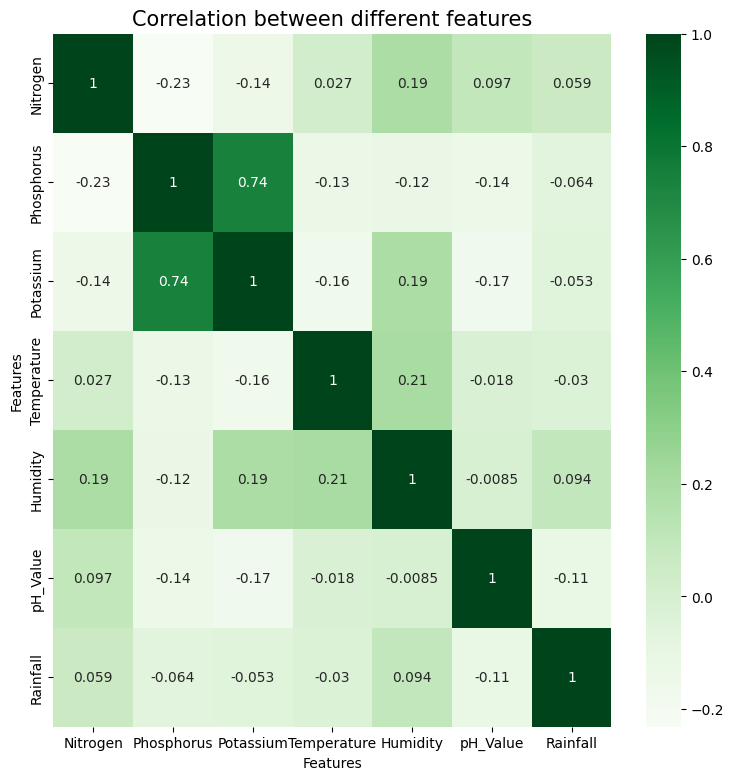

In [18]:
df_new.corr()
fig, ax= plt.subplots(1,1,figsize=(9,9))
sns.heatmap(data=df_new.corr(), annot=True, cmap='Greens')
ax.set(xlabel='Features')
ax.set(ylabel='Features')
plt.title('Correlation between different features', fontsize=15, c='black')
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Crop']= encoder.fit_transform(df['Crop'])
df.dtypes

,0
Nitrogen,int64
Phosphorus,int64
Potassium,int64
Temperature,float64
Humidity,float64
pH_Value,float64
Rainfall,float64
Crop,int64
Yield,int64


In [20]:
X= df.drop(columns=['Yield'])
y=df['Yield']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, shuffle = True, random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression
LR_model= LinearRegression()
LR_model.fit(X_train,y_train)

LinearRegression()

In [23]:
trainpred= LR_model.predict(X_train)
trainpred[:5]


array([1786.62232113, 2395.49233034, 2563.34661368, 3439.62889926,
       2706.01793498])

In [24]:
y_train.values[:5]

array([1540, 2050,  500, 2210, 1500])

In [25]:
testpred= LR_model.predict(X_test)
testpred[:5]

array([3548.96919099, 3481.80470239, 2678.22134875, 2729.03056573,
       1327.03159298])

In [26]:
y_test.values[:5]

array([1800, 1453, 4706, 1000,  910])

In [29]:
from sklearn.metrics import mean_squared_error
train_mse_lr=mean_squared_error(y_train, trainpred)
train_mse_lr

15089200.289599186

In [30]:
test_mse_lr=mean_squared_error(y_test, testpred)
test_mse_lr

6017626.402709833

In [31]:
from sklearn.tree import DecisionTreeRegressor
DTR_model= DecisionTreeRegressor()
DTR_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [32]:
trainpred= DTR_model.predict(X_train)
trainpred

array([1540., 2050.,  500., ...,  800., 2600., 4300.])

In [33]:
testpred= DTR_model.predict(X_test)
testpred

array([1.1049e+04, 5.7400e+03, 5.6000e+03, 6.0000e+03, 2.0000e+03,
       5.5000e+03, 2.7000e+03, 5.5000e+03, 8.5000e+03, 6.0000e+02,
       3.4750e+03, 6.0000e+02, 9.0000e+00, 2.4000e+03, 5.0000e+02,
       1.8200e+03, 2.3000e+03, 1.0000e+03, 4.1000e+03, 1.3000e+03,
       8.5000e+02, 2.4000e+03, 9.0000e+02, 7.0000e+02, 1.1200e+03,
       5.0000e+03, 2.5000e+03, 1.8500e+03, 9.0000e+02, 1.1000e+03,
       7.0000e+02, 4.1000e+03, 5.4000e+03, 1.2050e+03, 1.7750e+03,
       1.1200e+03, 5.5000e+02, 1.0200e+03, 3.9000e+03, 2.5000e+03,
       5.0000e+03, 1.1820e+03, 2.5000e+03, 6.5240e+03, 2.4000e+03,
       1.9000e+03, 7.5000e+03, 6.5000e+03, 1.7450e+03, 3.2000e+03,
       3.5000e+03, 8.0000e+00, 2.6500e+03, 2.6190e+03, 2.0000e+03,
       3.0000e+03, 4.0000e+02, 5.6500e+03, 2.1000e+03, 1.9000e+03,
       7.8500e+02, 2.3000e+03, 6.9500e+03, 7.0000e+03, 4.5500e+03,
       8.4000e+02, 1.0500e+03, 5.2500e+02, 5.0000e+02, 5.0000e+02,
       5.0000e+02, 2.8000e+03, 7.0000e+02, 8.0000e+02, 4.1520e

In [34]:
from sklearn.metrics import mean_squared_error
train_mse_dt= mean_squared_error(y_train, trainpred)
train_mse_dt

0.0

In [35]:
test_mse_dt=mean_squared_error(y_test, testpred)
test_mse_dt

18099758.338636365

In [36]:
from sklearn.linear_model import Lasso
L_model= Lasso(alpha=0.6)


In [38]:
L_model.fit(X_train, y_train)

Lasso(alpha=0.6)

In [39]:
trainpred= L_model.predict(X_train)
testpred= L_model.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
train_mse_lasso= mean_squared_error(y_train, trainpred)
train_mse_lasso

15089200.981821498

In [42]:
test_mse_lasso= mean_squared_error(y_test, testpred)
test_mse_lasso

6017502.895655545

In [43]:
from sklearn.linear_model import Ridge
R_Ridge= Ridge(alpha=0.6)

In [45]:
R_Ridge.fit(X_train, y_train)

Ridge(alpha=0.6)

In [46]:
trainpred= R_Ridge.predict(X_train)
testpred= R_Ridge.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error
train_mse_ridge= mean_squared_error(y_train, trainpred)
train_mse_ridge

15089200.291625068

In [48]:
test_mse_ridge= mean_squared_error(y_test, testpred)
test_mse_ridge

6017618.464196668

In [49]:
from sklearn.linear_model import ElasticNet
EN_model=ElasticNet(alpha=10, l1_ratio = 0.5)

In [50]:
EN_model.fit(X_train, y_train)

ElasticNet(alpha=10)

In [51]:
trainpred= EN_model.predict(X_train)
testpred= EN_model.predict(X_test)

In [52]:
train_mse_en= mean_squared_error(y_train, trainpred)
train_mse_en

15103903.159396414

In [53]:
test_mse_en=mean_squared_error(y_test, testpred)
test_mse_en

5977793.641900628

In [54]:
from sklearn.neighbors import KNeighborsRegressor
KNN_model=KNeighborsRegressor(n_neighbors=20)
KNN_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=20)

In [55]:
trainpred= KNN_model.predict(X_train)
testpred= KNN_model.predict(X_test)

In [56]:
train_mse_knn= mean_squared_error(y_train, trainpred)
train_mse_knn

14266248.548980113

In [57]:
test_mse_knn= mean_squared_error(y_test, testpred)
test_mse_knn

6868353.428721591

In [58]:
from sklearn.linear_model import LogisticRegression
LR_model= LogisticRegression(class_weight='balanced')
LR_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [59]:
trainpred=LR_model.predict(X_train)
testpred=LR_model.predict(X_test)

In [60]:
train_mse_logistic= mean_squared_error(y_train, trainpred)
train_mse_logistic

91190988.22556818

In [61]:
test_mse_logistic= mean_squared_error(y_test, testpred)
test_mse_logistic

38294984.08863636

<ipython-input-67-ef8c7f34f12f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=alogrithim_name, y= mse_train, palette = 'Spectral')


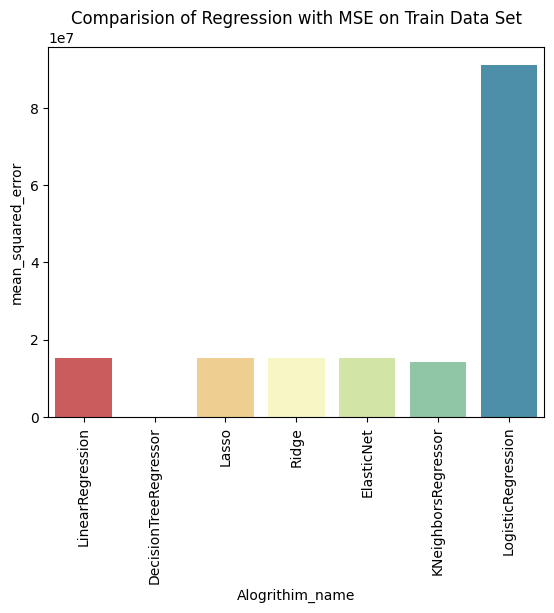

In [67]:
mse_train= [train_mse_lr, train_mse_dt, train_mse_lasso, train_mse_ridge,train_mse_en, train_mse_knn, train_mse_logistic ]
alogrithim_name=['LinearRegression', 'DecisionTreeRegressor', 'Lasso', 'Ridge', 'ElasticNet', 'KNeighborsRegressor', 'LogisticRegression']
sns.barplot(x=alogrithim_name, y= mse_train, palette = 'Spectral')
plt.xlabel('Alogrithim_name')
plt.ylabel('mean_squared_error')
plt.title('Comparision of Regression with MSE on Train Data Set')
plt.xticks(rotation= 90)
plt.show()

<ipython-input-66-5d6ed1f92170>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=alogrithim_name, y= mse_test, palette = 'Spectral')


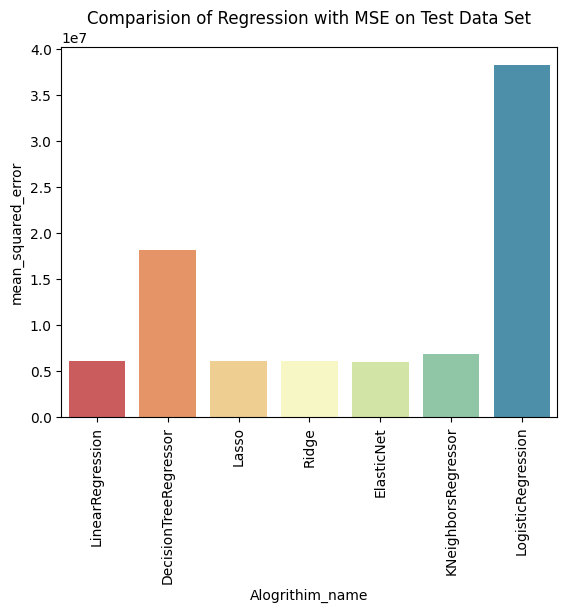

In [66]:
mse_test= [test_mse_lr, test_mse_dt, test_mse_lasso, test_mse_ridge,test_mse_en, test_mse_knn, test_mse_logistic ]
alogrithim_name=['LinearRegression', 'DecisionTreeRegressor', 'Lasso', 'Ridge', 'ElasticNet', 'KNeighborsRegressor', 'LogisticRegression']
sns.barplot(x=alogrithim_name, y= mse_test, palette = 'Spectral')
plt.xlabel('Alogrithim_name')
plt.ylabel('mean_squared_error')
plt.title('Comparision of Regression with MSE on Test Data Set')
plt.xticks(rotation= 90)
plt.show()

In [88]:
from sklearn.metrics import r2_score